<h2 style="text-align: center;">Modelo de Clasificación de Morosos</h2>


### Autor: Francisco Lackington

## Descripción
- En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
    - `default`: Variable binaria. Registra si el cliente entró en morosidad o no. (**vector objetivo**)
    - `income`: Ingreso promedio declarado por el cliente.
    - `balance`: Total de saldo en la cuenta de crédito.
    - `student`: Variable binaria. Registra si el cliente es estudiante o no.

In [1]:
# Importe librerías y módulos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix


In [2]:
# Importando set de datos y eliminando la columna index

df = pd.read_csv('default_credit.csv').drop(columns = ['index'])
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Análisis exploratorio


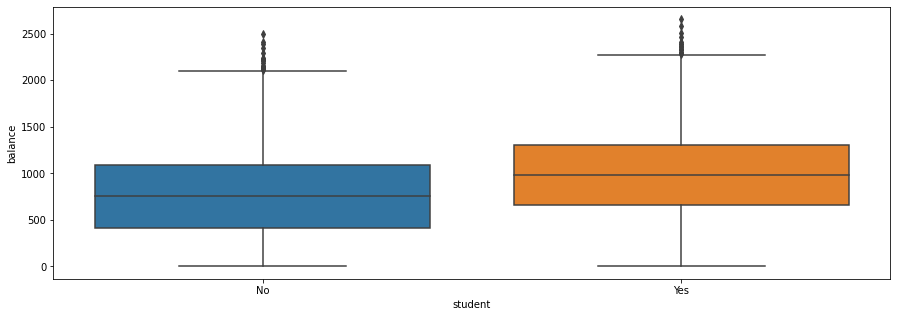

In [3]:
# Boxplot de balance versus estudiante
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'student', y = 'balance');

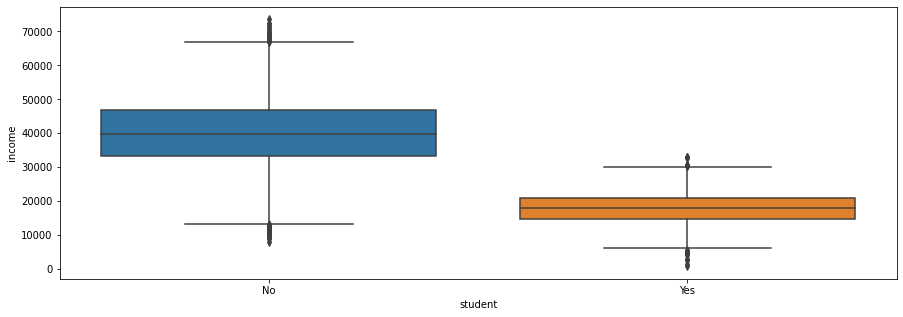

In [4]:
# Boxplot de ingreso versus estudiante
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'student', y = 'income');

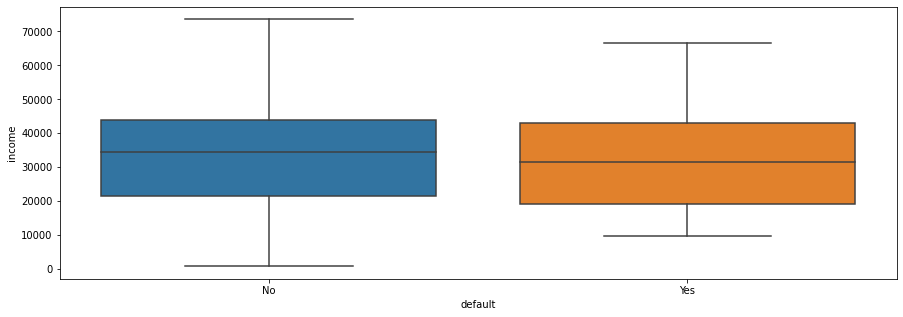

In [5]:
# Boxplot de ingreso versus default
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'default', y = 'income');

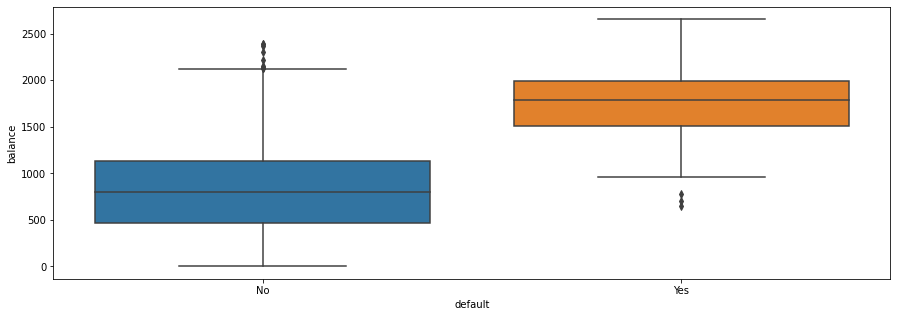

In [6]:
# Boxplot de balance versus default
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'default', y = 'balance');

<Figure size 1080x360 with 0 Axes>

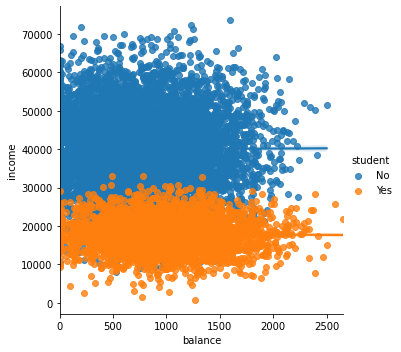

In [7]:
# Diagrama de dispersión entre balance e income segmentado por status de estudiante
plt.figure(figsize=(15,5))
sns.lmplot(data = df, x = 'balance', y = 'income', hue = 'student');

<Figure size 1080x360 with 0 Axes>

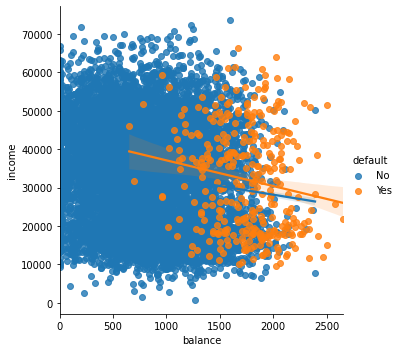

In [8]:
# Diagrama de dispersión entre balance e income segmentado por status de default
plt.figure(figsize=(15,5))
sns.lmplot(data = df, x = 'balance', y = 'income', hue = 'default');

**Comentarios**

- Se observa que al comparar el saldo en la cuenta de credito (balance), aquellos individuos que son estudiantes presentan una mayor mediana, esto quiere decir que el 50% de los registros presentan un mayor saldo que el 50% de aquellos que no son estudiantes
- Al comparar ingresos (income), aquellos individuos que no son estudiantes presentan una mayor mediana, osea el 50% de los registros presenta un mayor ingreso que aquellos individuos que son estudiantes.
- Al comparar balance vs income se observa una no peendiente en la caso de ser o no estudiante. Esto además muestra una gran varianza en los datos y ninguna correlación
- Para el caso de comparar balance vs income pero por morosidad, se observa que aquellos individuos que presentan morosidad y los que no tienen una pendientee negativa. Por otra parte, la varianza observada en ambos casos es muy alta, por lo que el R2 obtenido debe ser muy bajo.

## Modelación econométrica

In [9]:
# Recodificación de student y default

df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)

In [10]:
# Modelo smf.logit saturado

modelo_saturado = smf.logit('default ~ income + balance + student', df).fit()
modelo_saturado.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.4619
Time:                        14:35:44   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
# Modelo smf.logit depurado

modelo_depurado = smf.logit('default ~ balance + student', df).fit()
modelo_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.4619
Time:                        14:35:44   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Comentarios**

- Se observa un insignificante cambio en Log-Likelihood, por lo que el modelo depurado es el mejor modelo para este caso, dado que mantiene dicha métrica y con menos variables en el modelo.
- Por otra parte, se observa que la variable balance tiene un efecto positivo y estudiante un efecto negativo ssobre el vector objetivo (moroso o no)

## Machine Learning

In [12]:
# Segmentación de la muestra

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['balance','student']], df['default'],
                                                    test_size = 0.33, random_state = 1234)

In [13]:
# Estandarización de matriz de atributos

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [14]:
# Generar modelo y entrenar

modelo_morosos = LogisticRegression().fit(X_train_std, y_train)

In [15]:
# Almacenar predicciones de clases

y_hat = modelo_morosos.predict(X_test_std)

In [16]:
# Almacenar predicciones de probabilidad

y_hat_pr = modelo_morosos.predict_proba(X_test_std)[:, 1]

In [17]:
# Generando matriz de Confusion
confusion_matrix(y_test, y_hat)

array([[3176,   13],
       [  78,   33]])

In [18]:
# Reporte de métricas a partir de predicciones de clases
# ¿Que clientes seran morosos?

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3189
           1       0.72      0.30      0.42       111

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



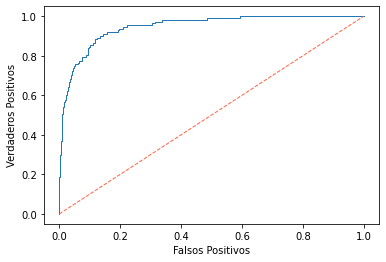

In [19]:
# Gráfico de curva ROC

false_positive, true_positive, threshold = roc_curve(y_test, y_hat_pr)

plt.plot(false_positive, true_positive, lw = 1)
plt.plot([0, 1], linestyle = '--', lw = 1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.show()

- Se observa que el modelo presenta un accuracy de 0.97
- Se observa que el modelo identifica solo el 30% de aquellos individuos morosos (Recall = 0.30), esto para el banco no es óptimo, dado que el objetivo no sera perder dinero. Lo que interesa para este caso es disminuir aquellos resultados obtenidos como Falsos Negativos y/o aumentar aquellos True Positives
- Se observa que si bien el F1-score como macro avg no es bajo, tampoco es el mejor. Aún así, cuando se aprecia el f1-score para la clase 1, se observa un valor muy bajo, lo cual indicaría que el modelo no es el óptimo para lo que requiere el banco.
